In [1]:
import pandas as pd

In [33]:
originalDataFrame = pd.read_csv('titanic.csv')
df = originalDataFrame.copy()
df = df[['Pclass','Sex','Age','Fare','Survived']]
df['Age'] = df['Age'].fillna(df['Age'].median())
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,28.0,23.4500,0
889,1,male,26.0,30.0000,1


In [34]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()

In [35]:
df['Sex_le'] = le_gender.fit_transform(df['Sex'])
df.head()

,Pclass,Sex,Age,Fare,Survived,Sex_le
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [36]:
x = df.drop(['Sex','Survived'],axis='columns')
y = df['Survived']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9)

In [39]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
y_predicted = model.predict(x_test)

In [47]:
model.score(x_test,y_test)

0.8111111111111111

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[51,  4],
       [13, 22]], dtype=int64)

Text(69.0, 0.5, 'Truth')

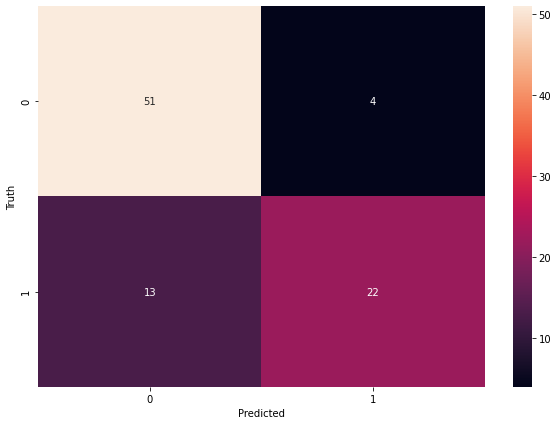

In [50]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
# plt.show()